ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

Scoring Rubric

Are my answers supported with data? (20 Points)

Tables, graphs, and charts must support your evaluation/answers.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)

 

Public dataset (5 Points)

Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.

 

What code is yours and what have you adapted? (5 Points)

You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.

 

Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.

 

Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.

 

Answers to listed questions (45 Points)

 

* Which independent variables are useful to predict a target (dependent variable)?

* Which independent variable have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013) Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

DATA SET:
This is a dataset of top 100 games of each category of games on Google Play Store along with their ratings and other data like price and number of installs.
The dataset consists of features like Rank, Title, Total ratings, installs, average rating, growth for 30 days, 60 days, price, category, 5,4,3,2,1 ratings and paid.



In [1169]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [1170]:
#reading the dataset
ds = pd.read_csv("https://raw.githubusercontent.com/Niharika-Santhoshini-Karri/Datascience_Assignment1/main/android-games.csv")

In [1171]:
ds

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False


#What are the data types? (Only numeric and categorical)


In [1172]:
# Identifying the Datatypes of the columns
ds.dtypes

rank                  int64
title                object
total ratings         int64
installs             object
average rating        int64
growth (30 days)    float64
growth (60 days)    float64
price               float64
category             object
5 star ratings        int64
4 star ratings        int64
3 star ratings        int64
2 star ratings        int64
1 star ratings        int64
paid                   bool
dtype: object

In the above datatypes, The numerical columns are either indicated int64 or float64 and the categorical columns are indicated object

In [1173]:
ds.isnull()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Are there missing values?


In [1174]:
#checking if any of the data is missing
ds.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

Therefore, There is no missing data

# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
 
 

In [1175]:
objList = ds.select_dtypes(exclude = "object").columns

In [1176]:
objList

Index(['rank', 'total ratings', 'average rating', 'growth (30 days)',
       'growth (60 days)', 'price', '5 star ratings', '4 star ratings',
       '3 star ratings', '2 star ratings', '1 star ratings', 'paid'],
      dtype='object')

In [1177]:
games_ds = ds[objList]
games_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1730.0,5.038671e+01,2.893674e+01,1.0,25.00,50.0,75.00,100.00
total ratings,1730.0,1.064332e+06,3.429250e+06,32993.0,175999.25,428606.5,883797.00,86273129.00
average rating,1730.0,3.908092e+00,2.909734e-01,2.0,4.00,4.0,4.00,4.00
growth (30 days),1730.0,3.217359e+02,6.018915e+03,0.0,0.10,0.5,1.70,227105.70
growth (60 days),1730.0,1.225550e+02,2.253892e+03,0.0,0.20,1.0,3.30,69441.40
price,1730.0,1.094220e-02,2.149873e-01,0.0,0.00,0.0,0.00,7.49
5 star ratings,1730.0,7.622315e+05,2.538658e+06,13975.0,127730.00,296434.0,619835.75,63546766.00
4 star ratings,1730.0,1.164366e+05,3.021631e+05,2451.0,20643.00,50980.5,101814.00,5404966.00
3 star ratings,1730.0,5.706307e+04,1.495314e+05,718.0,9652.50,25078.0,52295.00,3158756.00
2 star ratings,1730.0,2.710336e+04,8.154542e+04,266.0,4262.25,10675.5,23228.75,2122183.00


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


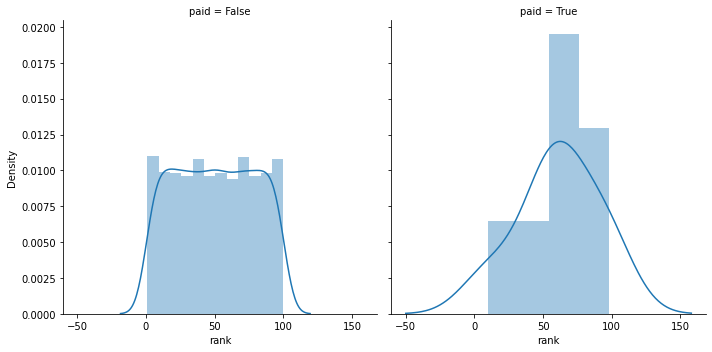

In [1178]:
num = sns.FacetGrid(games_ds, col='paid', size = 5)
num = num.map(sns.distplot,'rank')
plt.show()

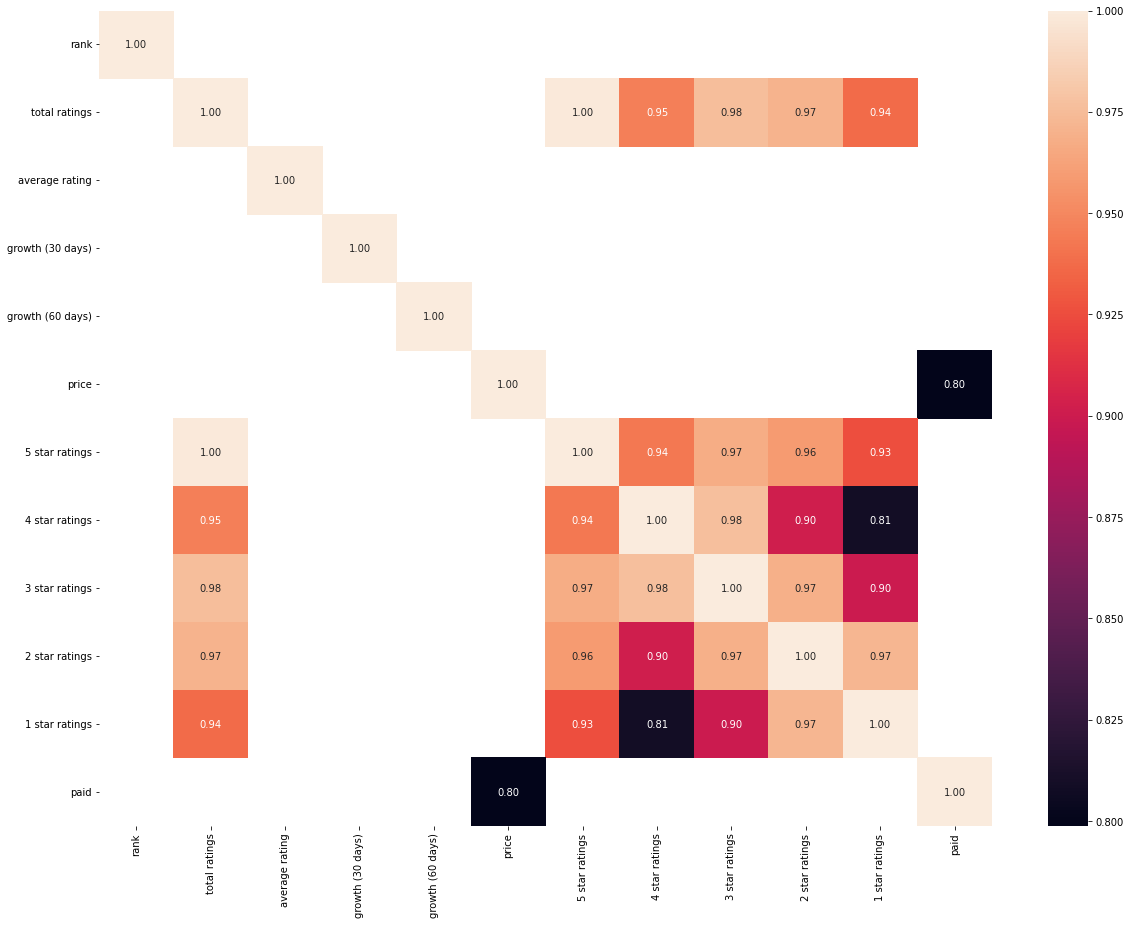

In [1179]:
#heat map
plt.figure(figsize = (20,15))
sns.heatmap(ds.corr(),mask = ds.corr() < 0.50,annot=True, fmt='0.2f')

In the heat map above, the collinearity between is visible and the range correlations is also plotted

In [1180]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [1181]:
objList = ds.select_dtypes(include = "object").columns
for feat in objList:
    ds[feat] = label_encoder.fit_transform(ds[feat].astype(str))

In [1182]:
ds

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,577,86273129,7,4,2.1,6.9,0.0,0,63546766,4949507,3158756,2122183,12495915,False
1,2,1016,37276732,7,4,1.8,3.6,0.0,0,28339753,2164478,1253185,809821,4709492,False
2,3,902,26663595,2,4,1.5,3.2,0.0,0,18777988,1812094,1050600,713912,4308998,False
3,4,217,17971552,2,4,1.4,4.4,0.0,0,13018610,1552950,774012,406184,2219794,False
4,5,1244,14464235,7,4,0.8,1.5,0.0,0,9827328,2124154,1047741,380670,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,1619,112408,0,4,0.9,1.8,0.0,16,101036,3607,3237,1229,3297,False
1726,97,159,111595,0,4,0.9,2.3,0.0,16,88950,14856,4297,1385,2103,False
1727,98,1191,110723,1,4,0.9,1.9,0.0,16,64184,18332,9385,6688,12132,False
1728,99,1529,109530,5,4,1.9,4.1,0.0,16,99987,4766,1469,953,2353,False


In [1183]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = ds.iloc[:,0:14]  
y = ds.iloc[:,-1]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dsscores = pd.DataFrame(fit.scores_)
dscolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dscolumns,dsscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

               Specs          Score
2      total ratings  482706.246079
13    1 star ratings  200115.807132
9     5 star ratings  141992.648218
10    4 star ratings  141533.801569
11    3 star ratings  110071.228407
12    2 star ratings   52279.259351
7              price    4659.484286
6   growth (60 days)     824.227441
5   growth (30 days)     121.364117
0               rank      16.138262


[1.19213433e-02 1.07120297e-02 1.76013913e-02 3.14719961e-02
 3.91431120e-04 3.09770799e-02 1.02350635e-02 8.24580140e-01
 9.75748584e-03 9.68699916e-03 8.00031975e-03 1.14256358e-02
 1.18079606e-02 1.14311239e-02]


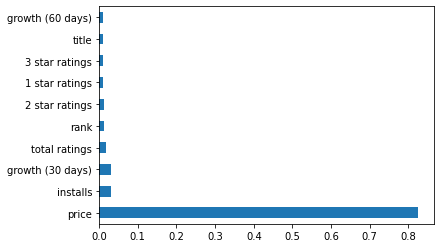

In [1184]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [1185]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [1186]:
X_test_plot = X_test

X_train_plot = X_train


# Do the training and test sets have the same data?

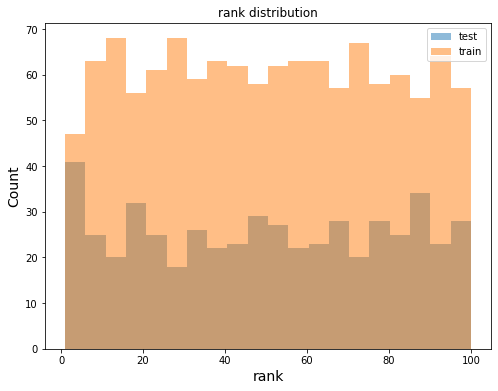

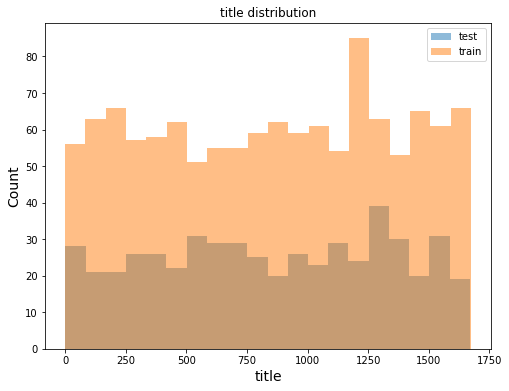

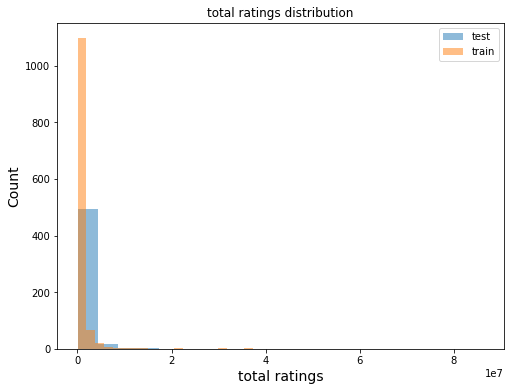

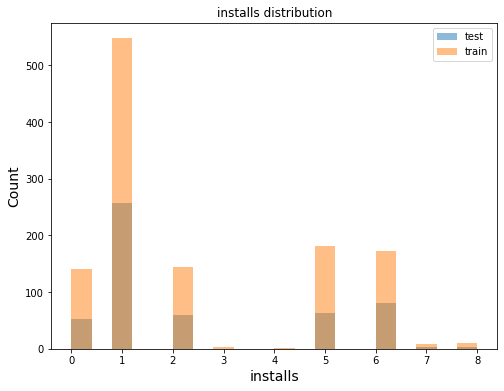

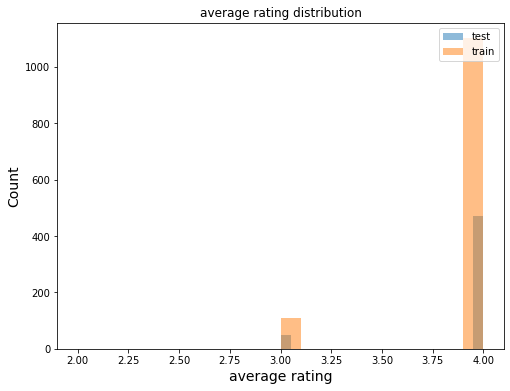

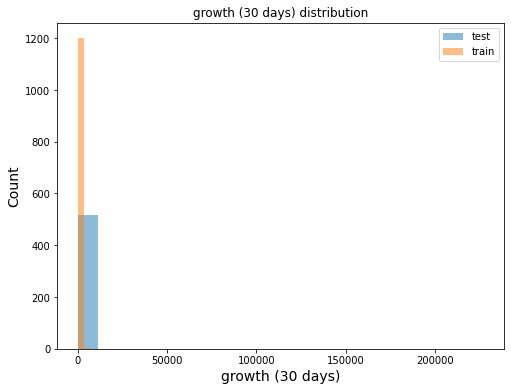

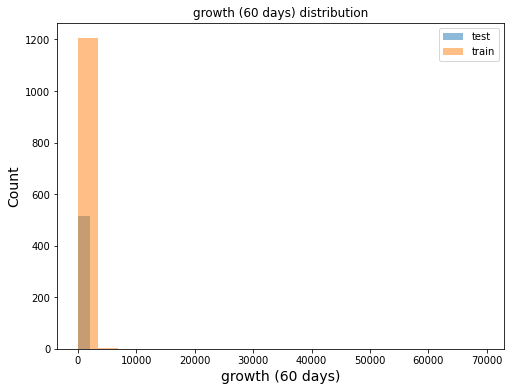

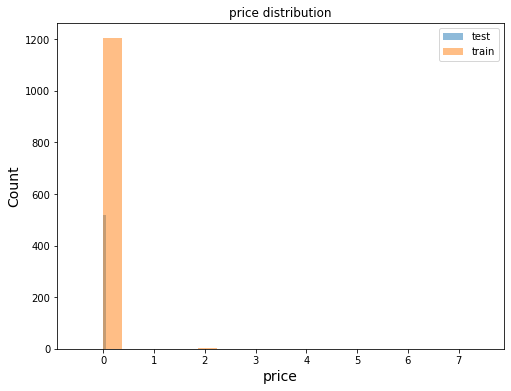

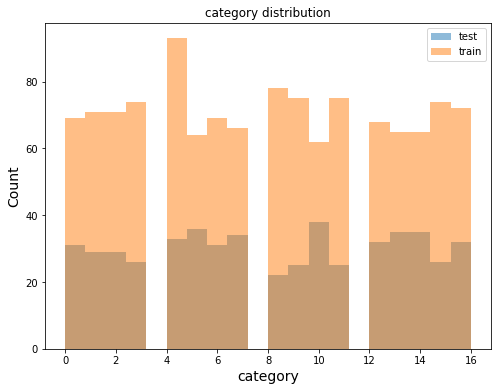

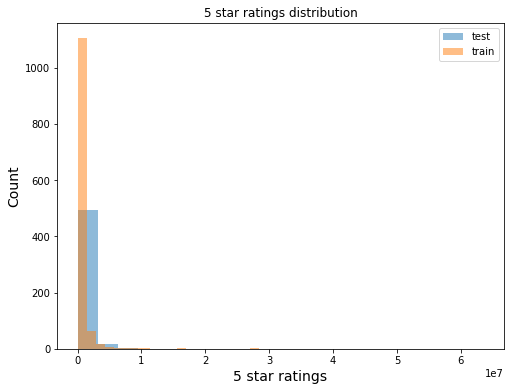

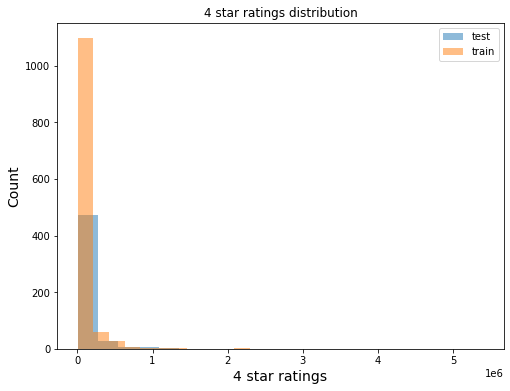

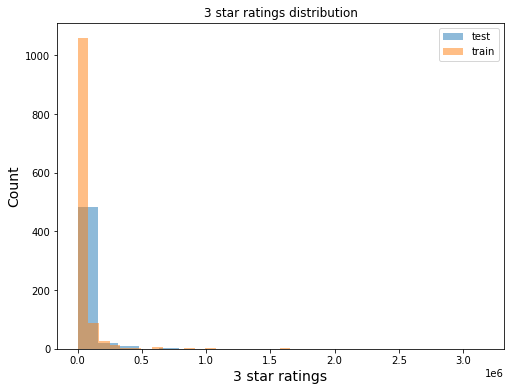

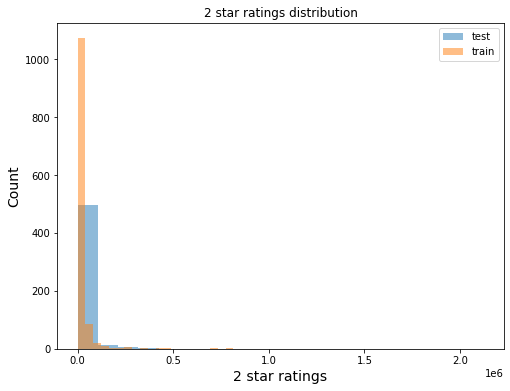

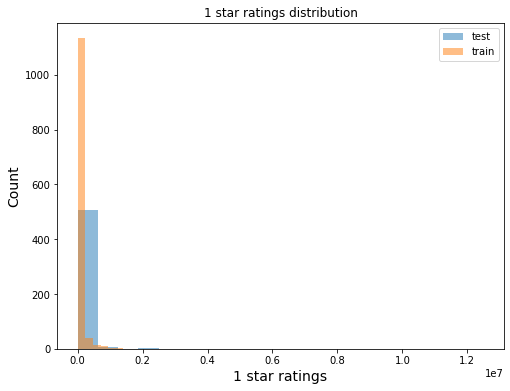

In [1187]:
#Plotting data for histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Therefore, Training and test sets have the same data based on the graphs plotted. Training and test sets lie almost in the same range 

#What are the likely distributions of the numeric variables?

#What are the distributions of the predictor variables?  


<Figure size 576x360 with 0 Axes>

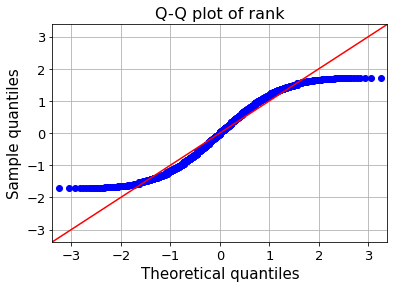

<Figure size 576x360 with 0 Axes>

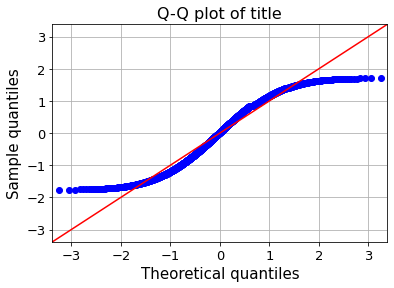

<Figure size 576x360 with 0 Axes>

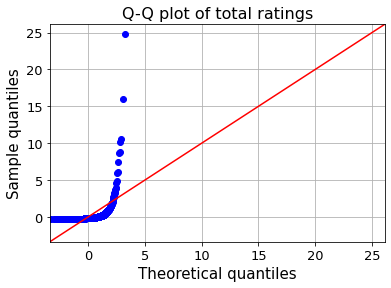

<Figure size 576x360 with 0 Axes>

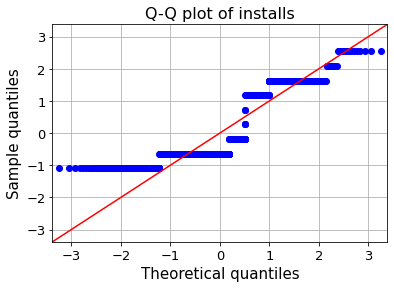

<Figure size 576x360 with 0 Axes>

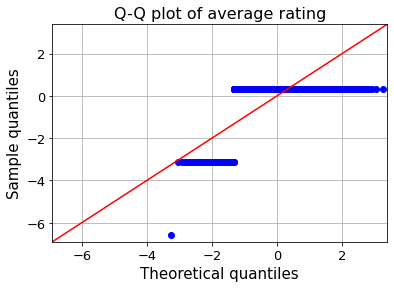

<Figure size 576x360 with 0 Axes>

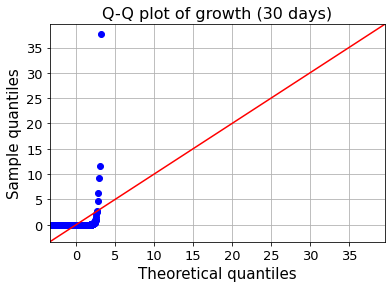

<Figure size 576x360 with 0 Axes>

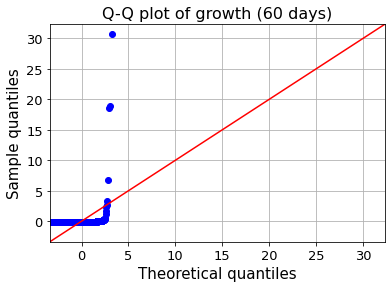

<Figure size 576x360 with 0 Axes>

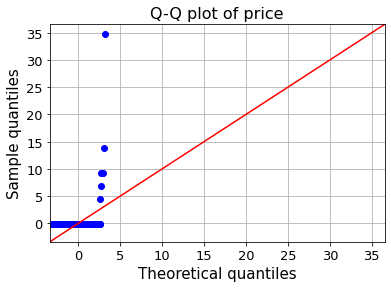

<Figure size 576x360 with 0 Axes>

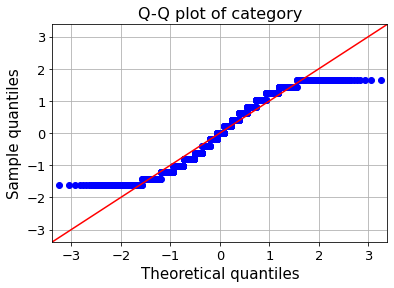

<Figure size 576x360 with 0 Axes>

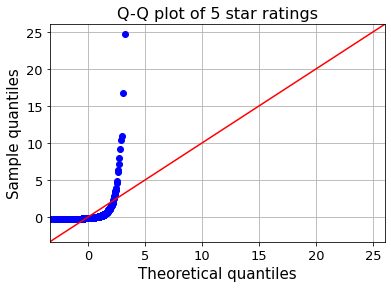

<Figure size 576x360 with 0 Axes>

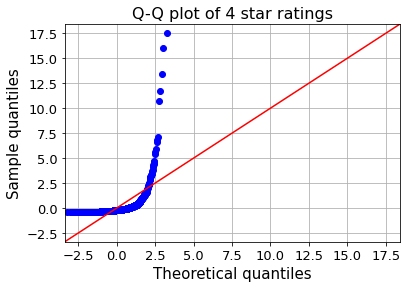

<Figure size 576x360 with 0 Axes>

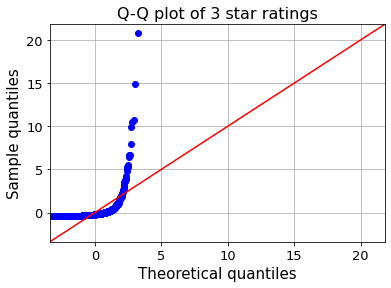

<Figure size 576x360 with 0 Axes>

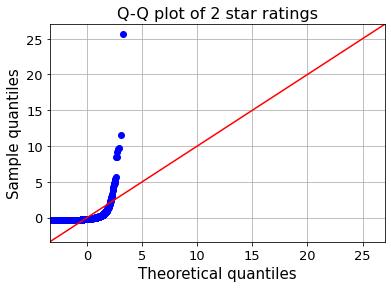

<Figure size 576x360 with 0 Axes>

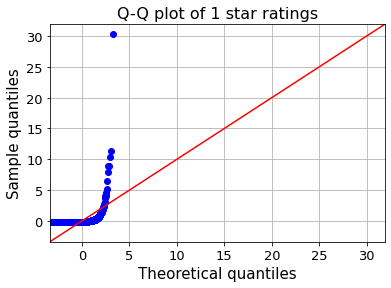

In [1188]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=X
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

By the Q-Q plots plotted, Rank is following normal distribution and the other features are roughly following exponential distributions like the star ratings and the growth days

In [1189]:
from scipy import stats

#Remove outliers and keep outliers (does if have an effect of the final predictive model)?


In [1190]:
def remove_outliers(ds):  # Function to Remove All outliers
    ds_removed_outliers = ds[(np.abs(stats.zscore(ds)) < 3).all(axis=1)]
    return ds_removed_outliers
# Removing outliers from training data
ds_onehot_no_outlier = remove_outliers(
    X)

# Removing outliers from testing data
#knn_impute_test_ds_onehot_no_outlier = remove_outliers(knn_impute_test_df_onehot_scaled)

In [1191]:
ds_onehot_no_outlier.describe()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1532.000000,1532.000000,1.532000e+03,1532.000000,1532.0,1532.000000,1532.000000,1532.0,1532.00000,1.532000e+03,1532.000000,1532.000000,1532.000000,1.532000e+03
mean,50.599217,850.246736,7.745251e+05,2.398172,4.0,64.161880,20.884399,0.0,8.01893,5.564773e+05,90502.259138,43030.086815,19325.049608,6.518791e+04
std,28.777417,484.997573,1.060616e+06,2.192129,0.0,586.993957,250.160473,0.0,4.86449,7.644452e+05,122448.012039,59314.560901,28629.150145,1.067257e+05
min,1.000000,0.000000,3.299300e+04,0.000000,4.0,0.000000,0.000000,0.0,0.00000,1.971500e+04,2451.000000,1053.000000,266.000000,5.450000e+02
25%,26.000000,419.750000,1.824285e+05,1.000000,4.0,0.100000,0.200000,0.0,4.00000,1.360065e+05,21435.500000,9490.750000,4020.000000,1.202825e+04
50%,51.000000,865.000000,4.339235e+05,1.000000,4.0,0.500000,1.000000,0.0,8.00000,3.054825e+05,51550.000000,24431.000000,10339.000000,3.178500e+04
75%,76.000000,1261.250000,8.805230e+05,5.000000,4.0,1.800000,3.400000,0.0,12.00000,6.228932e+05,101602.000000,49277.500000,21851.000000,7.035100e+04
max,100.000000,1674.000000,8.306868e+06,8.000000,4.0,15364.200000,6004.400000,0.0,16.00000,5.666720e+06,959679.000000,483208.000000,261701.000000,1.104879e+06


In [1192]:
#outliers remove 
data = ds
import scipy.stats as stats

In [1193]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(data)

print(scaler.data_max_)

ts_data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
#normData = pd.DataFrame(scaler.transform(ds), index=ds.index, columns=ds.columns)

print(ts_data)

[1.0000000e+02 1.6740000e+03 8.6273129e+07 8.0000000e+00 4.0000000e+00
 2.2710570e+05 6.9441400e+04 7.4900000e+00 1.6000000e+01 6.3546766e+07
 5.4049660e+06 3.1587560e+06 2.1221830e+06 1.2495915e+07 1.0000000e+00]
          rank     title  total ratings  installs  average rating  \
0     0.000000  0.344683       1.000000     0.875             1.0   
1     0.010101  0.606930       0.431861     0.875             1.0   
2     0.020202  0.538829       0.308796     0.250             1.0   
3     0.030303  0.129630       0.208007     0.250             1.0   
4     0.040404  0.743130       0.167338     0.875             1.0   
...        ...       ...            ...       ...             ...   
1725  0.959596  0.967145       0.000921     0.000             1.0   
1726  0.969697  0.094982       0.000911     0.000             1.0   
1727  0.979798  0.711470       0.000901     0.125             1.0   
1728  0.989899  0.913381       0.000887     0.625             1.0   
1729  1.000000  0.630824   

In [1194]:
from imblearn.over_sampling import SMOTE

X_ts = ts_data.iloc[:,0:14]  
y_ts = ts_data.iloc[:,-1]

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_ts, y_ts)

In [1195]:
new_df = X_train_res
new_df['paid'] =  y_train_res.values

In [1196]:
#find Q1, Q3, and interquartile range for each column
Q1 = new_df.quantile(q=.25)
Q3 = new_df.quantile(q=.75)
IQR = new_df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean =new_df[~((new_df < (Q1-1.5*IQR)) | (new_df > (Q3+1.5*IQR))).any(axis=1)]

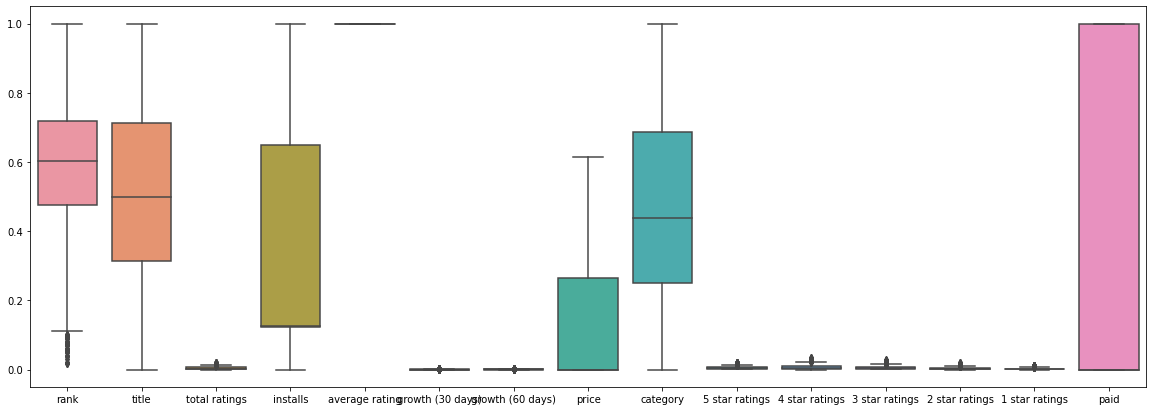

In [1197]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data_clean)

In [1198]:
data_clean

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
52,0.525253,0.223417,0.016959,0.750000,1.0,4.403236e-07,0.000003,0.000000,0.000000,0.017036,0.032787,0.025228,0.014003,0.008696,0.0
54,0.545455,0.439665,0.016520,0.250000,1.0,5.283883e-06,0.000039,0.000000,0.000000,0.016957,0.026599,0.024296,0.017288,0.008422,0.0
55,0.555556,0.605735,0.015812,0.250000,1.0,3.962912e-06,0.000027,0.000000,0.000000,0.016054,0.024355,0.021143,0.015678,0.010173,0.0
56,0.565657,0.689964,0.015210,0.250000,1.0,7.485501e-06,0.000053,0.000000,0.000000,0.015958,0.016441,0.018202,0.017564,0.010346,0.0
57,0.575758,0.396057,0.014708,0.750000,1.0,5.283883e-06,0.000036,0.000000,0.000000,0.014647,0.024662,0.021755,0.015388,0.009469,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.686985,0.255419,0.002117,0.000000,1.0,1.665821e-03,0.000050,0.196118,0.597701,0.002277,0.003777,0.003093,0.002597,0.001386,1.0
3442,0.574892,0.686416,0.000607,0.732333,1.0,3.200125e-06,0.000021,0.265688,0.820396,0.000805,0.001850,0.000926,0.000496,0.000181,1.0
3443,0.475450,0.243284,0.000845,0.028261,1.0,2.582757e-04,0.000030,0.260657,0.500000,0.001108,0.001629,0.001142,0.000738,0.000282,1.0
3444,0.457002,0.293049,0.000863,0.118063,1.0,3.470603e-06,0.000024,0.265688,0.551653,0.001118,0.001772,0.001186,0.000744,0.000283,1.0


In [1199]:
X_ts = data_clean.iloc[:,0:14]  
y_ts = data_clean.iloc[:,-1]

In [1200]:
ts_data_clean = data_clean

In [1201]:
X_train, X_test, y_train, y_test = train_test_split(ts_data_clean.iloc[:,0:14] , ts_data_clean.iloc[:,-1] , test_size=0.15, random_state=1)

In [1202]:
X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(new_df.iloc[:,0:14] , new_df.iloc[:,-1] , test_size=0.15, random_state=1)

#To check the effect on final predictive model?



In [1203]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [1204]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.01
Coefficient of determination: 0.94
R^2 score on tarining set = 0.9446108739116714


In [1205]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.02
Coefficient of determination: 0.92
R^2 score on test set = 0.9237378654384015


In [1206]:
#withoutliers
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_O,y_train_O)


LinearRegression()

In [1207]:
# Make predictions using the training set
y_pred = regr.predict(X_train_O)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train_O, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train_O, y_pred))
r2 = r2_score(y_train_O,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.06
Coefficient of determination: 0.75
R^2 score on tarining set = 0.7517543933831683


In [1208]:
# Make predictions using the testing set
y_pred = regr.predict(X_test_O)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test_O, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test_O, y_pred))
r2 = r2_score(y_test_O,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.09
Coefficient of determination: 0.64
R^2 score on test set = 0.6403691550962022


#Which predictor variables are the most important?


In [1209]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1210]:

#Important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.3179 ± 0.1081,price
0.0478 ± 0.0128,5 star ratings
0.0377 ± 0.0096,3 star ratings
0.0333 ± 0.0337,rank
0.0291 ± 0.0156,title
0.0140 ± 0.0031,4 star ratings
0.0015 ± 0.0051,total ratings
0.0009 ± 0.0034,installs
0.0006 ± 0.0001,growth (30 days)
-0.0000 ± 0.0000,average rating


The star ratings seem to be the most important among the features.

In [1211]:
missing_tf_data_clean = []

In [1212]:
missing_tf_data_clean = data_clean

In [1213]:
data_clean

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
52,0.525253,0.223417,0.016959,0.750000,1.0,4.403236e-07,0.000003,0.000000,0.000000,0.017036,0.032787,0.025228,0.014003,0.008696,0.0
54,0.545455,0.439665,0.016520,0.250000,1.0,5.283883e-06,0.000039,0.000000,0.000000,0.016957,0.026599,0.024296,0.017288,0.008422,0.0
55,0.555556,0.605735,0.015812,0.250000,1.0,3.962912e-06,0.000027,0.000000,0.000000,0.016054,0.024355,0.021143,0.015678,0.010173,0.0
56,0.565657,0.689964,0.015210,0.250000,1.0,7.485501e-06,0.000053,0.000000,0.000000,0.015958,0.016441,0.018202,0.017564,0.010346,0.0
57,0.575758,0.396057,0.014708,0.750000,1.0,5.283883e-06,0.000036,0.000000,0.000000,0.014647,0.024662,0.021755,0.015388,0.009469,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.686985,0.255419,0.002117,0.000000,1.0,1.665821e-03,0.000050,0.196118,0.597701,0.002277,0.003777,0.003093,0.002597,0.001386,1.0
3442,0.574892,0.686416,0.000607,0.732333,1.0,3.200125e-06,0.000021,0.265688,0.820396,0.000805,0.001850,0.000926,0.000496,0.000181,1.0
3443,0.475450,0.243284,0.000845,0.028261,1.0,2.582757e-04,0.000030,0.260657,0.500000,0.001108,0.001629,0.001142,0.000738,0.000282,1.0
3444,0.457002,0.293049,0.000863,0.118063,1.0,3.470603e-06,0.000024,0.265688,0.551653,0.001118,0.001772,0.001186,0.000744,0.000283,1.0


In [1214]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [1215]:
print(get_percent_missing(missing_tf_data_clean))

                       column_name  percent_missing
rank                          rank              0.0
title                        title              0.0
total ratings        total ratings              0.0
installs                  installs              0.0
average rating      average rating              0.0
growth (30 days)  growth (30 days)              0.0
growth (60 days)  growth (60 days)              0.0
price                        price              0.0
category                  category              0.0
5 star ratings      5 star ratings              0.0
4 star ratings      4 star ratings              0.0
3 star ratings      3 star ratings              0.0
2 star ratings      2 star ratings              0.0
1 star ratings      1 star ratings              0.0
paid                          paid              0.0


In [1216]:
missing_tf_data_clean_10 = missing_tf_data_clean
missing_tf_data_clean_5 = missing_tf_data_clean
missing_tf_data_clean_1 = missing_tf_data_clean

In [1217]:
def creat_missing_data(missing_tf_data_clean_10,n):
  for col_10 in missing_tf_data_clean_10.columns:
      missing_tf_data_clean_10.loc[missing_tf_data_clean_10.sample(frac=n).index, col_10] = pd.np.nan
  return(missing_tf_data_clean_10)

In [1218]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

#Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

#1%

In [1219]:
missing_tf_data_clean_10 = creat_missing_data(missing_tf_data_clean_10,0.01)

<ipython-input-1217-69dff3a0958d>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  missing_tf_data_clean_10.loc[missing_tf_data_clean_10.sample(frac=n).index, col_10] = pd.np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [1220]:
print(get_percent_missing(missing_tf_data_clean_10))

                       column_name  percent_missing
rank                          rank         1.019462
title                        title         1.019462
total ratings        total ratings         1.019462
installs                  installs         1.019462
average rating      average rating         1.019462
growth (30 days)  growth (30 days)         1.019462
growth (60 days)  growth (60 days)         1.019462
price                        price         1.019462
category                  category         1.019462
5 star ratings      5 star ratings         1.019462
4 star ratings      4 star ratings         1.019462
3 star ratings      3 star ratings         1.019462
2 star ratings      2 star ratings         1.019462
1 star ratings      1 star ratings         1.019462
paid                          paid         1.019462


#Imputation

In [1221]:
from sklearn.impute import KNNImputer

In [1222]:
missing_tf_data_clean_1_fill_median = missing_tf_data_clean_10.fillna(missing_tf_data_clean_1.median())

In [1223]:
missing_tf_data_clean_1_fill_mean = missing_tf_data_clean_10.fillna(missing_tf_data_clean_1.mean())

In [1224]:
#Creating a seperate dataframe for performing the KNN imputation
#df_number1 = df_number[['sample_num','number_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
missing_tf_data_clean_1_KNN = pd.DataFrame(imputer.fit_transform(missing_tf_data_clean_1), columns = missing_tf_data_clean_1.columns)


In [1225]:
missing_tf_data_clean_1_KNN.isna().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

#Model With 1% Median

In [1226]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_fill_median.iloc[:,0:14] , missing_tf_data_clean_1_fill_median.iloc[:,-1] , test_size=0.15, random_state=1)

In [1227]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.02
Coefficient of determination: 0.91
R^2 score on tarining set = 0.9145381100928501
Mean squared error: 0.02
Coefficient of determination: 0.91
R^2 score on test set = 0.9147657593609154


#Model With 1% Mean

In [1228]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_fill_mean.iloc[:,0:14] , missing_tf_data_clean_1_fill_mean.iloc[:,-1] , test_size=0.15, random_state=1)

In [1229]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [1230]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.02
Coefficient of determination: 0.93
R^2 score on tarining set = 0.9252199971160089


In [1231]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.02
Coefficient of determination: 0.91
R^2 score on test set = 0.9052667508174842


#Model 1% KNN

In [1232]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_KNN.iloc[:,0:14] , missing_tf_data_clean_1_KNN.iloc[:,-1] , test_size=0.15, random_state=1)

In [1233]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [1234]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.01
Coefficient of determination: 0.94
R^2 score on tarining set = 0.9446326552010162


In [1235]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.02
Coefficient of determination: 0.92
R^2 score on test set = 0.9227497298788437


#5%

In [1236]:
missing_tf_data_clean_5 = creat_missing_data(missing_tf_data_clean_5,0.04)

<ipython-input-1217-69dff3a0958d>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  missing_tf_data_clean_10.loc[missing_tf_data_clean_10.sample(frac=n).index, col_10] = pd.np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [1237]:
print(get_percent_missing(missing_tf_data_clean_5))

                       column_name  percent_missing
rank                          rank         5.004634
title                        title         5.004634
total ratings        total ratings         4.911956
installs                  installs         4.865616
average rating      average rating         4.958295
growth (30 days)  growth (30 days)         4.958295
growth (60 days)  growth (60 days)         4.958295
price                        price         5.004634
category                  category         5.004634
5 star ratings      5 star ratings         5.004634
4 star ratings      4 star ratings         5.004634
3 star ratings      3 star ratings         4.958295
2 star ratings      2 star ratings         4.958295
1 star ratings      1 star ratings         4.958295
paid                          paid         5.004634


In [1238]:
missing_tf_data_clean_1_fill_median = missing_tf_data_clean_10.fillna(missing_tf_data_clean_1.median())

In [1239]:
missing_tf_data_clean_1_fill_mean = missing_tf_data_clean_10.fillna(missing_tf_data_clean_1.mean())

In [1240]:
#Creating a seperate dataframe for performing the KNN imputation
#df_number1 = df_number[['sample_num','number_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
missing_tf_data_clean_1_KNN = pd.DataFrame(imputer.fit_transform(missing_tf_data_clean_1), columns = missing_tf_data_clean_1.columns)


#5% Median

In [1241]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_fill_median.iloc[:,0:14] , missing_tf_data_clean_1_fill_median.iloc[:,-1] , test_size=0.15, random_state=1)

In [1242]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.05
Coefficient of determination: 0.79
R^2 score on tarining set = 0.7891406149614719
Mean squared error: 0.05
Coefficient of determination: 0.82
R^2 score on test set = 0.8174808319879765


In [1243]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_fill_mean.iloc[:,0:14] , missing_tf_data_clean_1_fill_mean.iloc[:,-1] , test_size=0.15, random_state=1)

#5% Mean


In [1244]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_fill_mean.iloc[:,0:14] , missing_tf_data_clean_1_fill_mean.iloc[:,-1] , test_size=0.15, random_state=1)

In [1245]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.04
Coefficient of determination: 0.85
R^2 score on tarining set = 0.8510266468894871
Mean squared error: 0.04
Coefficient of determination: 0.85
R^2 score on test set = 0.8478888310329931


#5% KNN


In [1246]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_KNN.iloc[:,0:14] , missing_tf_data_clean_1_KNN.iloc[:,-1] , test_size=0.15, random_state=1)

In [1247]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.01
Coefficient of determination: 0.94
R^2 score on tarining set = 0.9434127369001792
Mean squared error: 0.02
Coefficient of determination: 0.92
R^2 score on test set = 0.9221930450232808


#10%

In [1248]:
missing_tf_data_clean_5 = creat_missing_data(missing_tf_data_clean_5,0.05)

<ipython-input-1217-69dff3a0958d>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  missing_tf_data_clean_10.loc[missing_tf_data_clean_10.sample(frac=n).index, col_10] = pd.np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [1249]:
print(get_percent_missing(missing_tf_data_clean_10))

                       column_name  percent_missing
rank                          rank         9.870250
title                        title         9.684893
total ratings        total ratings         9.545876
installs                  installs         9.731233
average rating      average rating         9.823911
growth (30 days)  growth (30 days)         9.777572
growth (60 days)  growth (60 days)         9.731233
price                        price         9.684893
category                  category         9.823911
5 star ratings      5 star ratings         9.870250
4 star ratings      4 star ratings         9.731233
3 star ratings      3 star ratings         9.592215
2 star ratings      2 star ratings         9.823911
1 star ratings      1 star ratings         9.592215
paid                          paid         9.777572


#10% MEDIAN


In [1250]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_fill_median.iloc[:,0:14] , missing_tf_data_clean_1_fill_median.iloc[:,-1] , test_size=0.15, random_state=1)

In [1251]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.05
Coefficient of determination: 0.79
R^2 score on tarining set = 0.7891406149614719
Mean squared error: 0.05
Coefficient of determination: 0.82
R^2 score on test set = 0.8174808319879765


#10% MEAN

In [1252]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_fill_mean.iloc[:,0:14] , missing_tf_data_clean_1_fill_mean.iloc[:,-1] , test_size=0.15, random_state=1)

In [1253]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.04
Coefficient of determination: 0.85
R^2 score on tarining set = 0.8510266468894871
Mean squared error: 0.04
Coefficient of determination: 0.85
R^2 score on test set = 0.8478888310329931


#10% KNN


In [1254]:
X_train, X_test, y_train, y_test = train_test_split(missing_tf_data_clean_1_KNN.iloc[:,0:14] , missing_tf_data_clean_1_KNN.iloc[:,-1] , test_size=0.15, random_state=1)

In [1255]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.01
Coefficient of determination: 0.94
R^2 score on tarining set = 0.9434127369001792
Mean squared error: 0.02
Coefficient of determination: 0.92
R^2 score on test set = 0.9221930450232808


Mean , Median and KNN methods are used for the imputation and the % errors updated are shown above

#Answer the listed Questions

Which independent variables are useful to predict a target (dependent variable)?

A) The order of dependent variables is as follows

Total ratings
1 star ratings
5 star ratings
4 star ratings
3 star ratings
2 star ratings
price
growth (60 days)
growth (30 days)
rank


Which independent variable have missing data? How much?

A) There are no independent variables with missing data. All the variables have data which can be seen in checking missing data above.

In the predictor variables independent of all the other predictor variables?

No, They are dependent on each other and it can be shown based on the correlation in the plots like  heat map above. 

Do the training and test sets have the same data?

A) Yes , Training and test sets have the same data based on the graphs plotted. Training and test sets lie almost in the same range according to them.


Which predictor variables are the most important?

A)
  price
	2 star ratings
	3 star ratings
	4 star ratings
	category
  installs
  5 star ratings
	1 star ratings
	growth (30 days)
	growth (60 days)
	total ratings
	title
	rank
	average rating

Do the ranges of the predictor variables make sense?

A) Yes, The predictor variables are similiar in ranges after the min max scaling

What are the distributions of the predictor variables?

A) By the Q-Q plots plotted, Rank is following normal distribution and the other features are roughly following exponential distributions like the star ratings and the growth days 

#REFERENCES

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

Sckit learn offcial documentation

Eli5 official documentation


MIT License
Copyright (c) 2023 Niharika Karri

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

